## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-4
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.8, 0.9]
NV = [True, False]

In [7]:
results = {}
for mo in MOMENTUM:
    for nv in NV:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        if nv:
            print("Experiment with MOMENTUM = %.6f with nesterov" % (mo))
        else:
            print("Experiment with MOMENTUM = %.6f without nesterov" % (mo))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nv, momentum=mo)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        
        if nv:
            exp_name_tag = "exp-mo-%s-nv" % str(mo)
        else:
            exp_name_tag = "exp-mo-%s" % str(mo)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with MOMENTUM = 0.700000 with nesterov
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructio

50000/50000 [==============================] - 2s 33us/step - loss: 1.8411 - acc: 0.3592 - val_loss: 1.8405 - val_acc: 0.3605
Epoch 49/50
50000/50000 [==============================] - 2s 32us/step - loss: 1.8381 - acc: 0.3595 - val_loss: 1.8380 - val_acc: 0.3608
Epoch 50/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.8352 - acc: 0.3606 - val_loss: 1.8351 - val_acc: 0.3609
Experiment with MOMENTUM = 0.700000 without nesterov
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (De

50000/50000 [==============================] - 2s 32us/step - loss: 1.8521 - acc: 0.3535 - val_loss: 1.8543 - val_acc: 0.3501
Epoch 50/50
50000/50000 [==============================] - 2s 31us/step - loss: 1.8488 - acc: 0.3552 - val_loss: 1.8507 - val_acc: 0.3505
Experiment with MOMENTUM = 0.800000 with nesterov
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)            

50000/50000 [==============================] - 2s 33us/step - loss: 1.7908 - acc: 0.3766 - val_loss: 1.7919 - val_acc: 0.3740
Experiment with MOMENTUM = 0.800000 without nesterov
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.2513 - acc: 0.1706 - val_loss: 2.1984 - val_acc: 0.2065
Epoch 2/50
50000/50000 [==============================] - 2s 32us/step - loss: 2.1627 - acc: 0.2204 - val_loss: 2.1300 - val_acc: 0.2308
Epoch 3/50
50000/50000 [==============================] - 2s 33us/step - loss: 2.1064 - acc: 0.2417 - val_loss: 2.0837 - val_acc: 0.2511
Epoch 4/50
50000/50000 [==============================] - 2s 33us/step - loss: 2.0657 - acc: 0.2568 - val_loss: 2.0477 - val_acc: 0.2680
Epoch 5/50
50000/50000 [==============================] - 2s 34us/step - loss: 2.0330 - acc: 0.2708 - val_loss: 2.0181 - val_acc: 0.2772
Epoch 6/50
50000/50000 [==============================] - 2s 32us/step - loss: 2.0059 - acc: 0.2828 - val_loss: 1.9941 - val_acc: 0.2932
Epoch 7/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.9831 - acc: 0.2946 - val_loss: 1.9727 - val_acc

50000/50000 [==============================] - 2s 32us/step - loss: 2.1987 - acc: 0.2161 - val_loss: 2.1757 - val_acc: 0.2389
Epoch 3/50
50000/50000 [==============================] - 2s 32us/step - loss: 2.1492 - acc: 0.2493 - val_loss: 2.1307 - val_acc: 0.2555
Epoch 4/50
50000/50000 [==============================] - 2s 31us/step - loss: 2.1078 - acc: 0.2634 - val_loss: 2.0940 - val_acc: 0.2699
Epoch 5/50
50000/50000 [==============================] - 2s 32us/step - loss: 2.0730 - acc: 0.2748 - val_loss: 2.0612 - val_acc: 0.2791
Epoch 6/50
50000/50000 [==============================] - 2s 31us/step - loss: 2.0418 - acc: 0.2861 - val_loss: 2.0325 - val_acc: 0.2928
Epoch 7/50
50000/50000 [==============================] - 2s 32us/step - loss: 2.0134 - acc: 0.2981 - val_loss: 2.0053 - val_acc: 0.3009
Epoch 8/50
50000/50000 [==============================] - 2s 32us/step - loss: 1.9880 - acc: 0.3079 - val_loss: 1.9815 - val_acc: 0.3048
Epoch 9/50
50000/50000 [============================

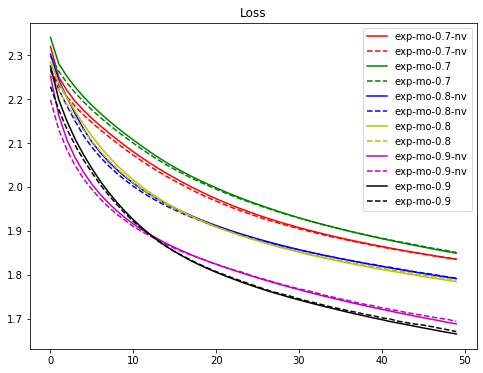

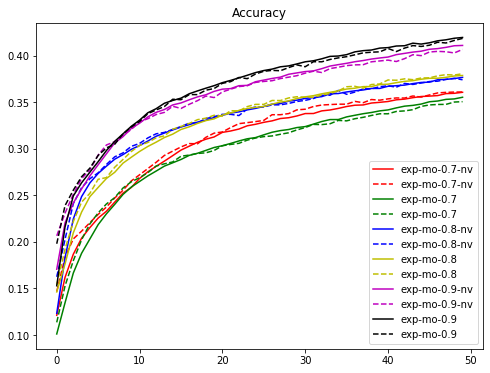

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()